<a href="https://colab.research.google.com/github/Abrartintoiya018/Genrative_AI_project/blob/main/Modelexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Normalization Example**

In [3]:
# Normalization Example

import numpy as np

# Sample data

data = np.array([10, 20, 30, 40, 50,100, 300, 2000, 10000]) # 1000 is an outlier

# Min-Max Scaling: Scales values between 0 and 1
def min_max_scalling(data):
  min_val = np.min(data)
  max_val = np.max(data)
  scaled_data = (data - min_val) / (max_val - min_val)
  return scaled_data

# Z-Score Standardization: Mean = 0, Standard Deviation = 1
def z_score_standardization(data):
  mean = np.mean(data)
  std = np.std(data)
  scaled_data = (data - mean) / std
  return scaled_data

# Apply normalization techniques
min_max_scaled_data = min_max_scalling(data)
z_score_scaled_data = z_score_standardization(data)

print("Original Data:", data)
print("Min-Max Scaled Data:", min_max_scaled_data)
print("Z-Score Scaled Data:", z_score_scaled_data)

Original Data: [   10    20    30    40    50   100   300  2000 10000]
Min-Max Scaled Data: [0.         0.001001   0.002002   0.003003   0.004004   0.00900901
 0.02902903 0.1991992  1.        ]
Z-Score Scaled Data: [-0.4462978  -0.44307414 -0.43985048 -0.43662682 -0.43340316 -0.41728486
 -0.35281166  0.19521052  2.77413842]


# **Example 1 - MNIST Handwritten Digits Classification**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8844 - loss: 0.4226
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9642 - loss: 0.1232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9750 - loss: 0.0798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9828 - loss: 0.0554
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0418
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0885
Test accuracy: 97.610003%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


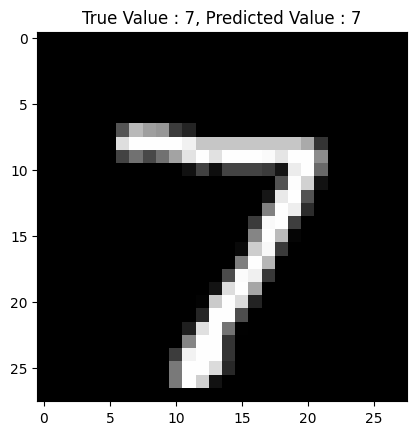

In [7]:
# Dense Layers - Example 1 - MNIST Handwritten Digits Data

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Dense layers expect a 1D input, so whenever the preceding layer produces multi-dimensional output,
# We must flatten it to 1D before passing it to a Dense layer

# If the input to a Dense layer is not already 1D, use Flatten to convert it to 1D

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:2f}%')

predictions = model.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()





# **Example 2 - House Price Prediction (Regression)**

# Synthetic dataset

In [8]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset
# Predict house prices based on 10 numerical features

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 500000 ## House price between 0-500k


x_test = np.random.rand(100, 10)
y_test = np.random.rand(100) * 500000

# Build model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) ## single output for regression

## compile model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

## train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

## evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

## Make a prediction
new_data = np.random.rand(1, 10)
predicted_price = model.predict(new_data)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')

# MAE is around 240K - 258K, which means on average, the predictions are off by nearly half of the actual house price.
# This is very bad because an error of  500K means the model is almost random.
# The dataset is completely random, meaning there is no real pattern for the model to learn.
# The model is guessing house prices randomly, which is why MAE is so large.
# In short, bad model



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 88159535104.0000 - mae: 258191.8594
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86149357568.0000 - mae: 257752.6875  
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82550472704.0000 - mae: 248516.5625
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86434201600.0000 - mae: 257429.6094 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88949768192.0000 - mae: 259803.3906
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85154095104.0000 - mae: 254293.7656
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82807652352.0000 - mae: 249879.5781
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84787625984.0000 - mae: 252897.5625
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81107025920.0000 - mae: 246462.0000
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83590070272.0000 - mae: 251207.0625
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81667547

# Synthetic dataset and Normalization

In [1]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)  # Targets in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')

# Make a prediction
sample_input = np.random.rand(1, 10)  # In [0,1] range
predicted_value = model.predict(sample_input)
print(f'Predicted Value (Normalized): {predicted_value[0][0]:.4f}')

# This is again a bad model because we are still training on random values (just normalised values)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2692 - mae: 0.4327
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0922 - mae: 0.2551
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0889 - mae: 0.2570
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0851 - mae: 0.2480
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0871 - mae: 0.2532
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0821 - mae: 0.2448
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0772 - mae: 0.2381
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0835 - mae: 0.2468
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0815 - mae: 0.2424
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0826 - mae: 0.2475
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0814 - mae: 0.2462
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0772 - mae: 0.2369
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0

# Dataset from scikit-learn

In [2]:
# Example 2 - House Price Prediction (Regression) with Dataset
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

## Load california housing dataset
housing = fetch_california_housing()
x,y = housing.data, housing.target

print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

## Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Compute mean & std from training data, then scale
x_test = scaler.transform(x_test) # Use the same scaling parameters to transform test data

# We use the same mean and standard deviation (computed from x_train) to scale x_test
# This ensures that both training and test data follow the same distribution

# If we include x_test when computing mean and standard deviation, the model gets information from the test set before training
# This is called data leakage, which can lead to unrealistically good performance and poor generalization to new data
# Test data should only be used for evaluation after the model is trained

# In real-world applications, new data arrives after training. We do not get to recompute the mean and std for each new data point
# The model should be able to handle unseen data using the same scaling applied during training

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(x_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')  # Convert to actual dollars


Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0184 - mae: 0.9652
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4358 - mae: 0.4719
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3746 - mae: 0.4363
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3660 - mae: 0.4265
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3460 - mae: 0.4138
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3444 - mae: 0.4094
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3126 - mae: 0.3890
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.3698 - mae: 0.4007
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3165 - mae: 0.3891
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2975 - mae: 0.3806
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3013 - mae: 0.3824
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2913 - mae: 0.3743
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━

# **3 - Sentiment Analysis (Binary Classification)**

# Without Embedding Layer

In [3]:
# Example 3 - Sentiment Analysis (Binary Classification) - Without Embedding Layer
# Classify whether a review is positive or negative

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words.

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)),  # Convert 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make a prediction on the first test sample
predicted_sentiment = model.predict(x_test[0:1])
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5009 - loss: 239.7959
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5161 - loss: 61.2877
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5372 - loss: 29.3244
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5386 - loss: 15.3333
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5323 - loss: 7.2691
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4958 - loss: 4.8132
Test accuracy: 49.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Sentiment: Positive


# With Embedding Layer

In [4]:
# Example 3 - Sentiment Analysis (Binary Classification) - With Embedding Layer

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers with an Embedding layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200),  # Converts word indices to vectors
    layers.Flatten(),  # Flatten embeddings into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 369ms/step - accuracy: 0.5846 - loss: 0.6515
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 0.9289 - loss: 0.1914
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - accuracy: 0.9864 - loss: 0.0551
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 407ms/step - accuracy: 0.9990 - loss: 0.0054
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.9997 - loss: 0.0021
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 1.0000 - loss: 3.9199e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 372ms/step - accuracy: 1.0000 - loss: 2.6376e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 25s 465ms/step - accuracy: 1.0000 - loss: 1.5273e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 1.0000 - loss: 1.1086e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 1.0000 - loss: 8.1226e-05
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8545 - loss: 0.6496
Test accuracy: 85.54%


# **Example 4 - Breast Cancer Prediction (Binary Classification)**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4810 - loss: 0.7347 - val_accuracy: 0.8684 - val_loss: 0.4071
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9024 - loss: 0.3554 - val_accuracy: 0.9386 - val_loss: 0.2255
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9444 - loss: 0.2133 - val_accuracy: 0.9561 - val_loss: 0.1480
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.1264 - val_accuracy: 0.9561 - val_loss: 0.1123
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9739 - loss: 0.1239 - val_accuracy: 0.9561 - val_loss: 0.0947
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9745 - loss: 0.0893 - val_accuracy: 0.9561 - val_loss: 0.0849
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9825 - loss: 0.0742 - val_accuracy: 0.9561 - val_loss: 0.0795
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9820 - loss: 0.0762 - val_accuracy: 0.9561 - val_loss: 0.0739


Text(0.5, 1.0, 'Model Loss')

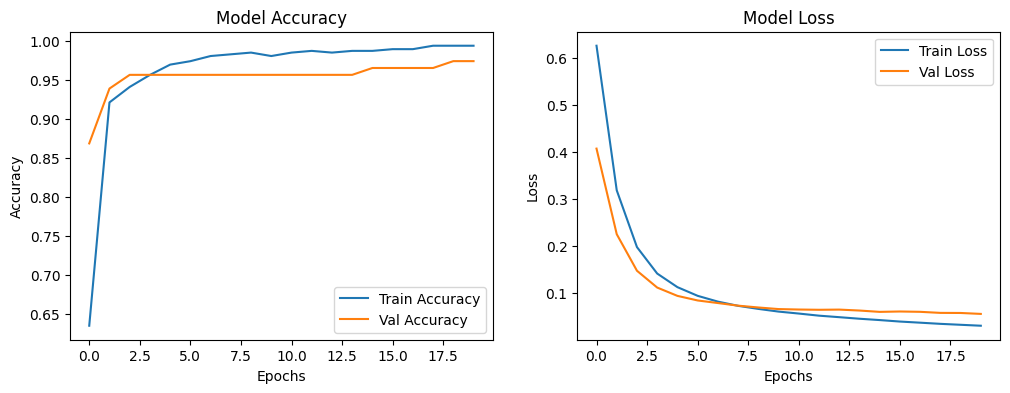

In [6]:
# The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
# from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
# based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
# dataset and is commonly used for binary classification tasks in machine learning.

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# **Example 5 - Wine Quality Prediction (Multiclass Classification)**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5342 - loss: 1.0206 - val_accuracy: 0.6111 - val_loss: 0.8299
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6315 - loss: 0.8235 - val_accuracy: 0.7222 - val_loss: 0.6567
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7786 - loss: 0.6233 - val_accuracy: 0.8056 - val_loss: 0.5264
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8935 - loss: 0.4813 - val_accuracy: 0.8611 - val_loss: 0.4191
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9322 - loss: 0.3439 - val_accuracy: 0.8889 - val_loss: 0.3296
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9627 - loss: 0.2726 - val_accuracy: 0.8889 - val_loss: 0.2579
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9856 - loss: 0.1861 - val_accuracy: 0.9722 - val_loss: 0.2074
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9978 - loss: 0.1593 - val_accuracy: 1.0000 - val_loss: 0.1685
Epoch 9/50


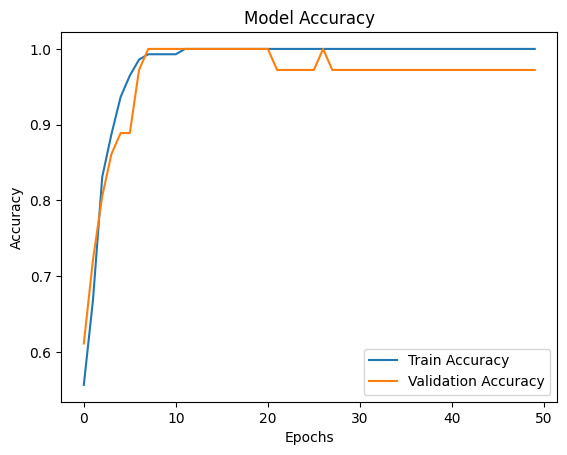

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Class: 0, Actual Class: 0


In [7]:
# The Wine dataset from Scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing different chemical properties of wines.
# The goal is to classify wines into three types (Class 0, 1, and 2) based on their composition.
# It originates from the UCI Machine Learning Repository and is commonly used for multiclass classification tasks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
X, y = data.data, data.target  # Features and target labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes (0, 1, 2)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since y is not one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predict a sample
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')

# Using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# Example: Without stratify=y
# If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
# a random split without stratification might result in:

# Training set: 90% Class 0, 8% Class 1, 2% Class 2
# Test set: 60% Class 0, 30% Class 1, 10% Class 2

# This skews the distribution, leading to poor generalization.

# Example: With stratify=y

# Training set: 80% Class 0, 15% Class 1, 5% Class 2
# Test set: 80% Class 0, 15% Class 1, 5% Class 2

# This ensures a balanced representation of all classes in both sets.

# Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.

